In [93]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

# Se analizará una Base de Datos de Kaggle, sobre información del Titanic

In [141]:
df = pd.read_csv(r"C:\Users\GUSTAVO\Desktop\GustavoALL\Cursos\01_ Bases de datos para Practicar\Titanic\train.csv")
df_index = pd.DataFrame(df["PassengerId"], columns=["PassengerId"])
del df["PassengerId"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
df.shape

(891, 11)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [145]:
del df["Name"] 
del df["Ticket"]
del df["Cabin"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [146]:
df.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

In [147]:
df.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [148]:
df.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [149]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [151]:
# AQUI CONVERTIMOS NUESTRA VARIABLE SEX, A BINARIA, EN EL CUAL MUJER=1 Y HOMBRE=0

df["Pclas"] = 0
df.loc[df["Pclass"]==1,'Pclas']="Primera Clase"
df.loc[df["Pclass"]==2,'Pclas']="Segunda Clase"
df.loc[df["Pclass"]==3,'Pclas']="Tercera Clase"
del df["Pclass"]

df.columns = df.columns.str.replace("Pclas", "Pclass")

In [152]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass
0,0,male,22.0,1,0,7.2500,S,Tercera Clase
1,1,female,38.0,1,0,71.2833,C,Primera Clase
2,1,female,26.0,0,0,7.9250,S,Tercera Clase
3,1,female,35.0,1,0,53.1000,S,Primera Clase
4,0,male,35.0,0,0,8.0500,S,Tercera Clase


In [153]:
#MUJER=0 Y HOMBRE=1

et_encoder = LabelEncoder()
df["Sex"] = et_encoder.fit_transform(df["Sex"]) 
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass
0,0,1,22.0,1,0,7.2500,S,Tercera Clase
1,1,0,38.0,1,0,71.2833,C,Primera Clase
2,1,0,26.0,0,0,7.9250,S,Tercera Clase
3,1,0,35.0,1,0,53.1000,S,Primera Clase
4,0,1,35.0,0,0,8.0500,S,Tercera Clase


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Pclass    891 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


In [155]:
df_embarked = pd.get_dummies(df["Embarked"])
df_pclass = pd.get_dummies(df["Pclass"])

In [156]:
del df["Embarked"]
del df["Pclass"]
df = pd.concat([df,df_embarked, df_pclass], axis=1) 
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,Primera Clase,Segunda Clase,Tercera Clase
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [164]:
y = pd.DataFrame(df.iloc[: , 0:1])
x = pd.DataFrame(df.iloc[: , 1:])

In [165]:
# Utilizaremos KNN Imputer para llenar los valores null de "Age".
imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            891 non-null    float64
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    float64
 3   Parch          891 non-null    float64
 4   Fare           891 non-null    float64
 5   C              891 non-null    float64
 6   Q              891 non-null    float64
 7   S              891 non-null    float64
 8   Primera Clase  891 non-null    float64
 9   Segunda Clase  891 non-null    float64
 10  Tercera Clase  891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


In [167]:
df = pd.concat([y, X], axis=1)
df.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,Primera Clase,Segunda Clase,Tercera Clase
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,30.387677,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066
std,0.486592,0.477990,14.410282,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,38.250000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
df.index = df_index["PassengerId"]
df

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,Primera Clase,Segunda Clase,Tercera Clase
PassengerId,,,,,,,,,,,,
1,0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,0.0,0.0
5,0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,1.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0
888,1,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0
889,0,0.0,20.0,1.0,2.0,23.4500,0.0,0.0,1.0,0.0,0.0,1.0


In [169]:
df = df[df["Fare"]!=0]
df.shape

(876, 12)

1.0    562
0.0    314
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------


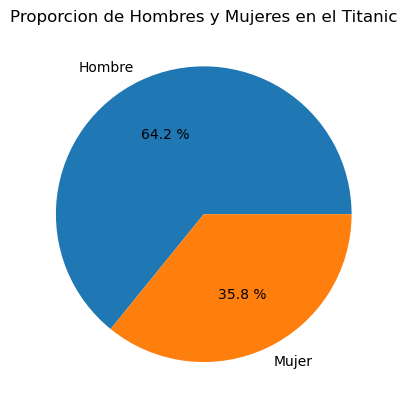

In [170]:
hombre_mujer = df["Sex"].value_counts()
print(hombre_mujer)
print("--"*50)
nombres=["Hombre", "Mujer"]
plt.pie(hombre_mujer, labels=nombres, autopct="%0.1f %%")
plt.title('Proporcion de Hombres y Mujeres en el Titanic')
plt.show()

In [171]:
df.groupby(["Sex"]).mean()["Age"]

Sex
0.0    27.425955
1.0    31.869520
Name: Age, dtype: float64

Como se observa, en promedio la edad de los hombres es superior al de las mujeres, con casi 4 años.

In [172]:
df.groupby(["Sex","Survived"]).mean()["Age"]

Sex  Survived
0.0  0           24.944444
     1           28.288627
1.0  0           32.661894
     1           28.538611
Name: Age, dtype: float64

Vemos Primeramente que las mujeres que se han salvado del naufragio, en promedio tienen mayor edad que las mujeres que no se han salvado y tambien menos edad que los hombres que si sobrevivieron.  
Por otro lado, los hombre que han sobrevivido al naufragio, tienen mayor edad en promedio que los hombres que no han sobrevivido y tambien mayor edad en promedio que las mujeres que han fallecido.

In [173]:
df.groupby(["Sex","Survived"]).size()

Sex  Survived
0.0  0            81
     1           233
1.0  0           454
     1           108
dtype: int64

Como se sabe, en el Titanic, habia la politica de que las mujeres y niños tenian prioridad para ser salvados, y esto se ve reflejado en los datos, en el cual se observa que existe una mayor cantidad de hombres que no sobrevivieron al naufragio en cambio para las mujeres hay mayor cantidad de sobrevivientes.

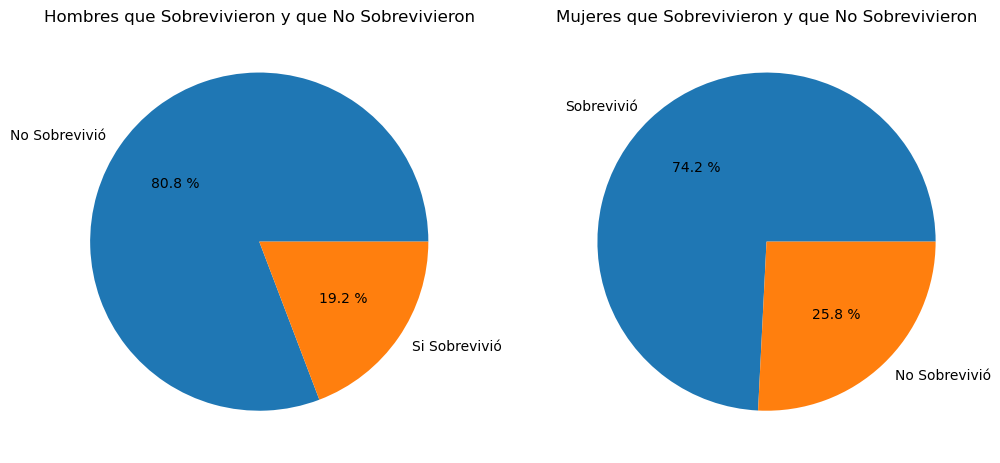

In [174]:
#Analisis de Diferencia entre hombres y mujeres
mujeres = df["Survived"].where(df["Sex"]==0).value_counts()
hombres = df["Survived"].where(df["Sex"]==1).value_counts()

nombres1 =["No Sobrevivió", "Si Sobrevivió"]
nombres2 = ["Sobrevivió", "No Sobrevivió"]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(hombres, labels=nombres1, autopct="%0.1f %%")
plt.title('Hombres que Sobrevivieron y que No Sobrevivieron')
plt.subplot(122)
plt.pie(mujeres, labels=nombres2, autopct="%0.1f %%")
plt.title('Mujeres que Sobrevivieron y que No Sobrevivieron')
plt.show()

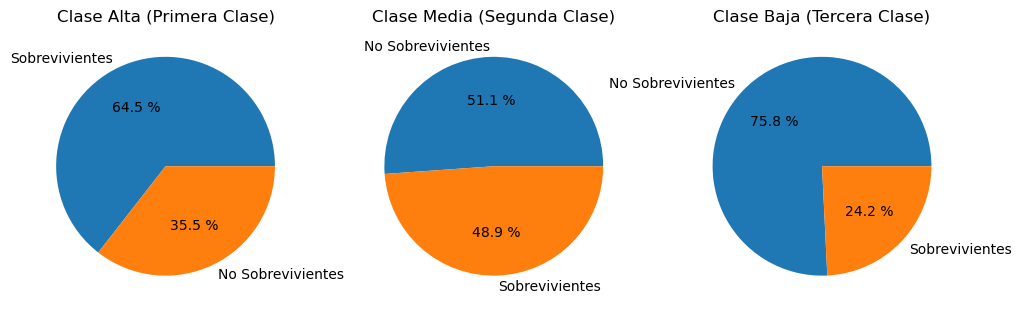

In [181]:
#Analisis de las Clases
clase1 = df["Survived"].where(df["Primera Clase"]==1).value_counts()
clase2 = df["Survived"].where(df["Segunda Clase"]==1).value_counts()
clase3 = df["Survived"].where(df["Tercera Clase"]==1).value_counts()

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.pie(clase1, labels=["Sobrevivientes", "No Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Alta (Primera Clase)')
plt.subplot(132)
plt.pie(clase2, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Media (Segunda Clase)')
plt.subplot(133)
plt.pie(clase3, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Baja (Tercera Clase)')
plt.show()

Graficamente, podemos observar mejor las proporciones de los sobrevivientes segun la clase a la que pertenecian, y podemos determinar descriptivamente, que la clase alta fueron los que más sobrevivieron.

Los datos de los niños que sobrevivieron y que no, son los siguientes: 
1.0    42
0.0    29
Name: Survived, dtype: int64
Y los que no son niños sus datos son: 
0.0    506
1.0    299
Name: Survived, dtype: int64
----------------------------------------------------------------------------------------------------


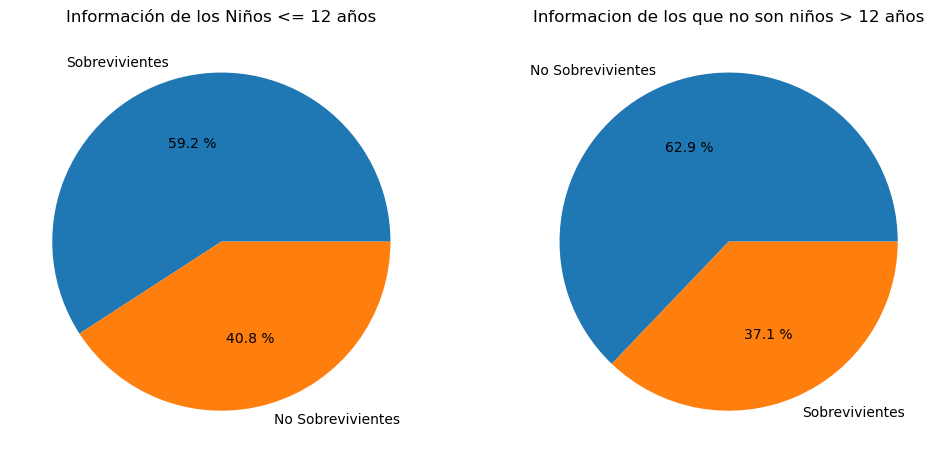

In [183]:
#Analisis de los niños con los que no eran niños.
niños = df["Survived"].where(df["Age"]<=12).value_counts()
no_niños = df["Survived"].where(df["Age"]>12).value_counts()
print(f"Los datos de los niños que sobrevivieron y que no, son los siguientes: \n{niños}\nY los que no son niños sus datos son: \n{no_niños}")
print("-"*100)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(niños, labels=["Sobrevivientes", "No Sobrevivientes"], autopct="%0.1f %%")
plt.title('Información de los Niños <= 12 años')
plt.subplot(122)
plt.pie(no_niños, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Informacion de los que no son niños > 12 años')
plt.show()

Tambien como se esperaba, existe una mayor proporción de sobrevivientes niños(as) que los que son mayores a estos, dado por las politica que se manejó en el Titanic.

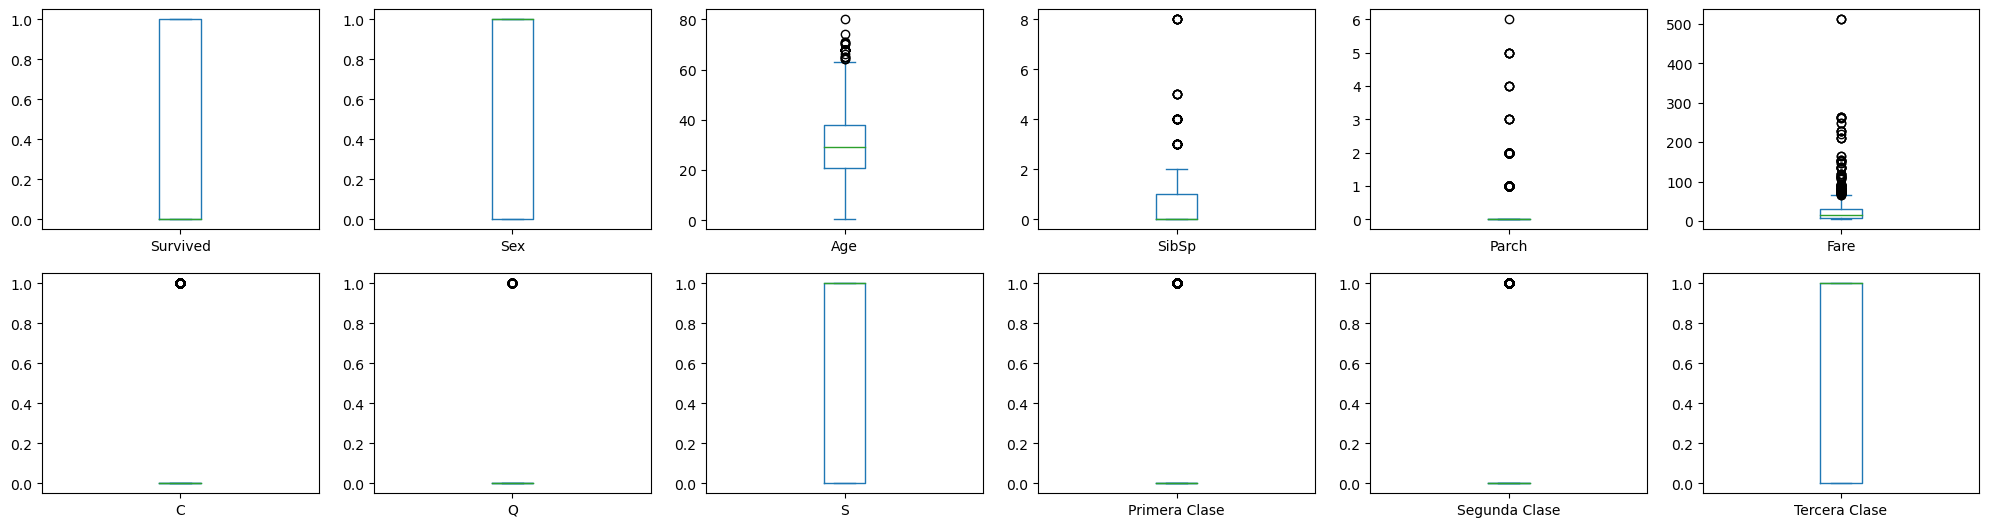

In [116]:
# box plot
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
(df.rename(columns=lambda x: str(x))
        .plot(ax=ax, kind= 'box', subplots=True, layout=(6,6))
)
plt.show()

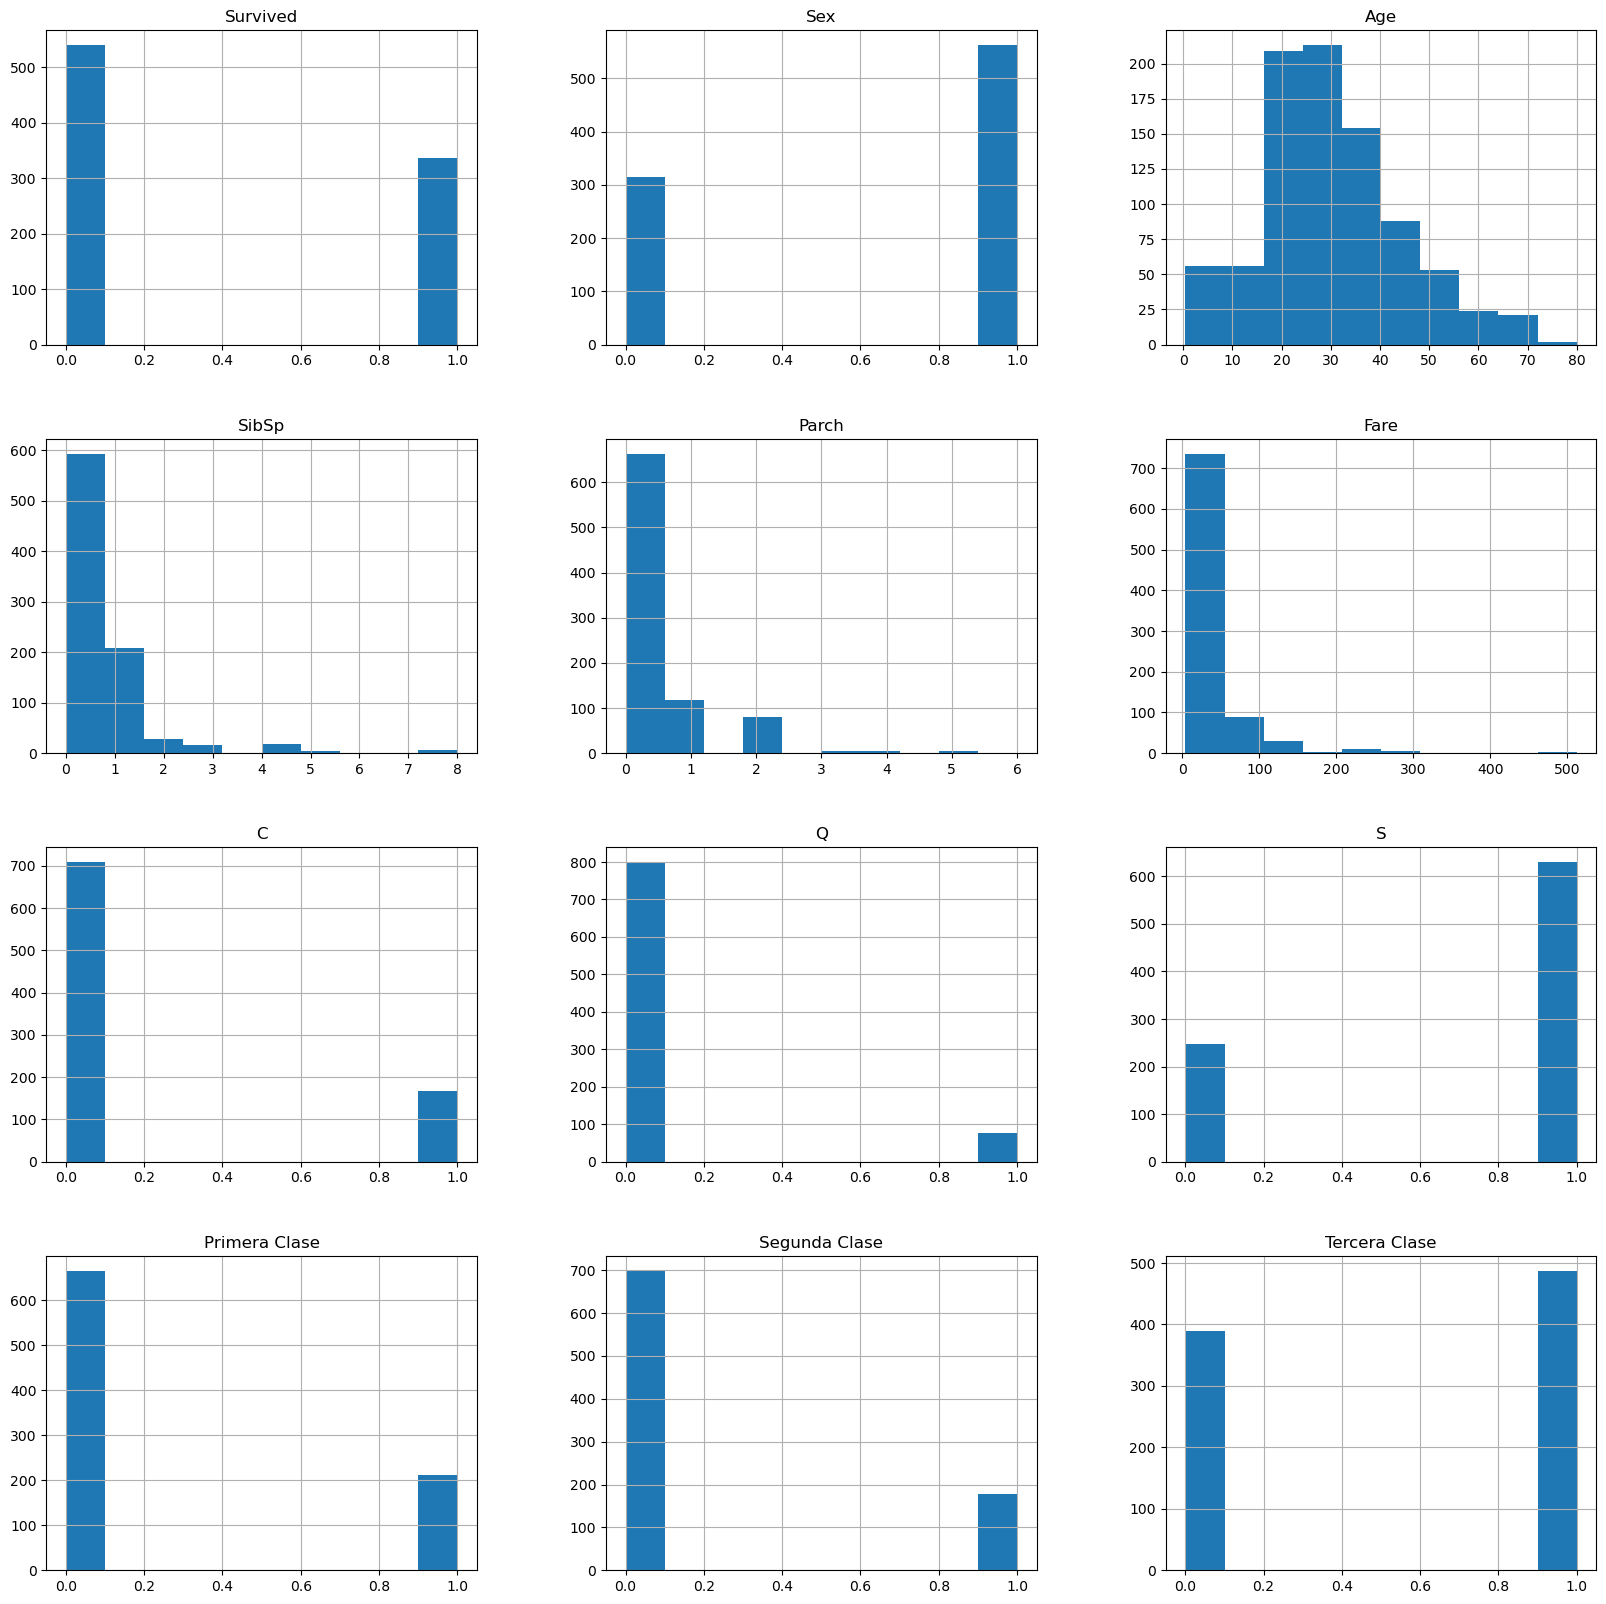

In [117]:
# histogramas - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

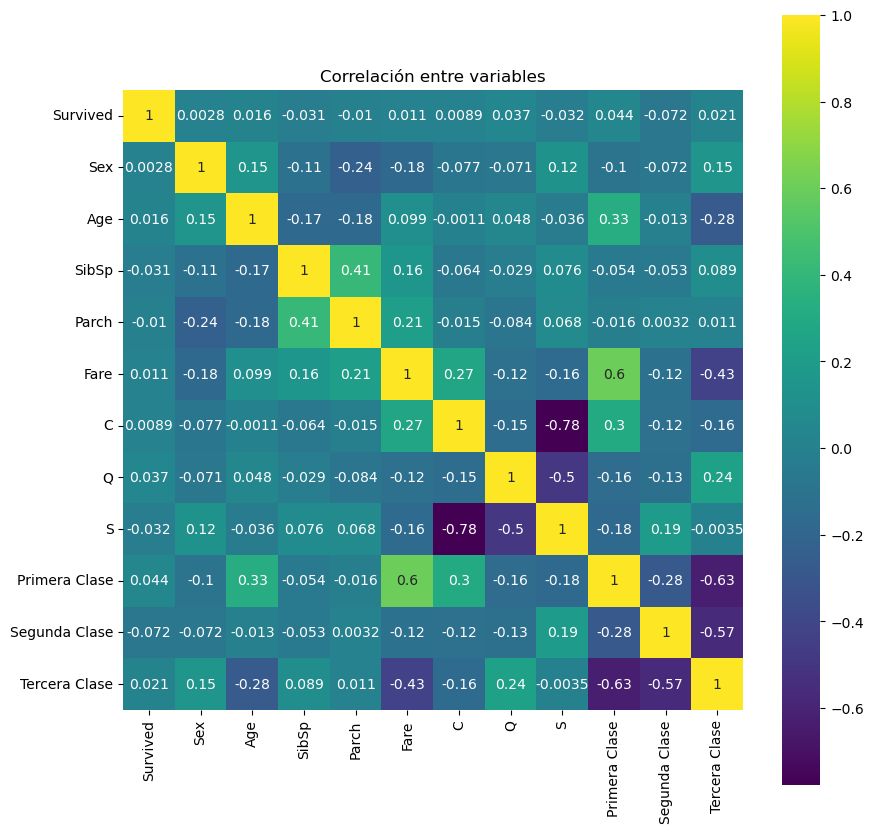

In [118]:
# Correlograma
correlation = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')

# ----------
plt.title('Correlación entre variables')
plt.show()

## Fase de modelado

In [194]:
Y_train = pd.DataFrame(df.iloc[: , 0:1])
X_train = pd.DataFrame(df.iloc[: , 1:])

In [195]:
scoring = 'accuracy'

# Creamos algoritmos base
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [196]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

LR: 79.68%
LDA: 78.88%
KNN: 68.27%
CART: 77.74%
NB: 75.01%
SVM: 66.56%


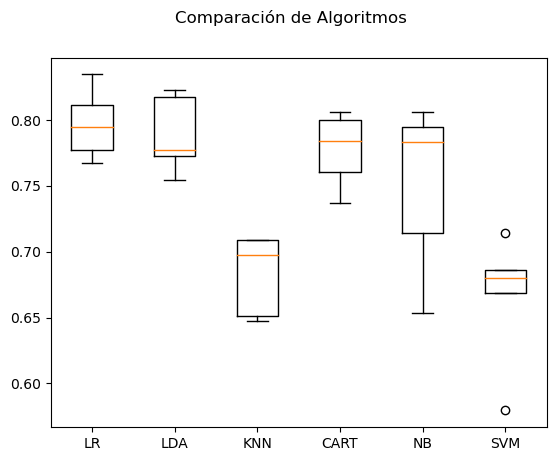

In [197]:
# Comparamos Algortimos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [198]:
# Escalamos usando MinMaxScaler()
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

ScaledLoR: 79.45%
ScaledLDA: 78.88%
Scaledk-NN: 80.48%
ScaledCART: 78.20%
ScaledNB: 75.01%
ScaledSVM: 80.94%


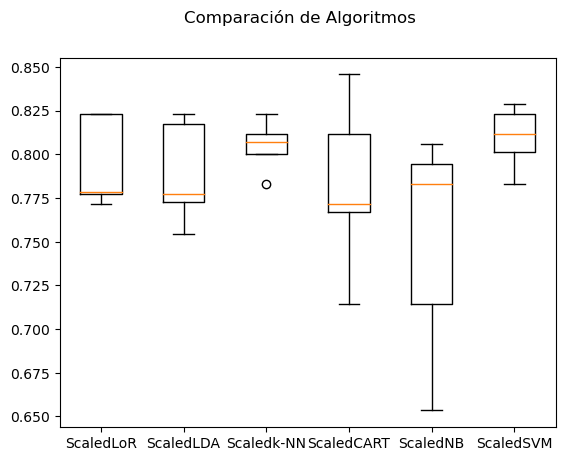

In [199]:
# Comparamos Algortimos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [200]:
# Usamos el metodo yeo-johnson
pipelines = []
pipelines.append(('YH LoR', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('LR', LogisticRegression(solver="lbfgs", max_iter=1000))])))
pipelines.append(('YH LDA', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('YH k-NN', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('KNN', KNeighborsClassifier())])))
pipelines.append(('YH CART', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('CART', DecisionTreeClassifier())])))
pipelines.append(('YH NB', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('NB', GaussianNB())])))
pipelines.append(('YH SVM', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train,Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

YH LoR: 80.14%
YH LDA: 78.88%
YH k-NN: 79.91%
YH CART: 77.97%
YH NB: 73.87%
YH SVM: 80.60%


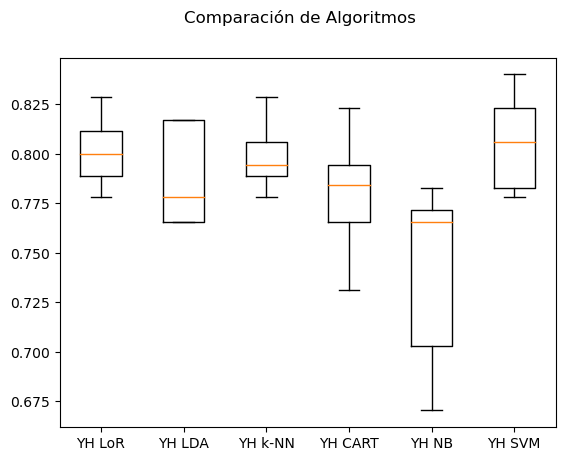

In [201]:
# Comparamos Algortimos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Optimizamos los Modelos

In [192]:
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Modificamos los Hiperparametros de KNeighborsClassifier, ya que fue uno de los que nos dió mejor resultado.

n_neighbors = np.array([1,3,7,9,11,13,15,17,19,21])
algorithm = np.array(["auto", "ball_tree", "kd_tree", "brute"])

param_grid = dict(n_neighbors=n_neighbors, algorithm=algorithm)

model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8025064935064936 using {'algorithm': 'ball_tree', 'n_neighbors': 3}


In [203]:
# Modificamos los Hiperparametros de SVC, ya que fue uno de los que nos dió mejor resultado.

c_values = np.array([1.0, 1.3, 1.5, 1.7, 2.0, 3.0, 4.0])
kernel_values = np.array(["linear", "poly", "rbf", "sigmoid"])
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820799 using {'C': 3.0, 'kernel': 'poly'}


## Algoritmos Ensamblados

In [204]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(random_state=seed)))
ensembles.append(('GBM', GradientBoostingClassifier(random_state=seed)))
ensembles.append(('RF', RandomForestClassifier(random_state=seed)))
ensembles.append(('ET', ExtraTreesClassifier(random_state=seed)))
ensembles.append(('BGD', BaggingClassifier(base_estimator= SVC(), random_state=seed)))
ensembles.append(('VC', VotingClassifier(models, voting="hard")))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

AB: 79.69%
GBM: 81.96%
RF: 80.25%
ET: 79.45%
BGD: 67.36%
VC: 78.66%


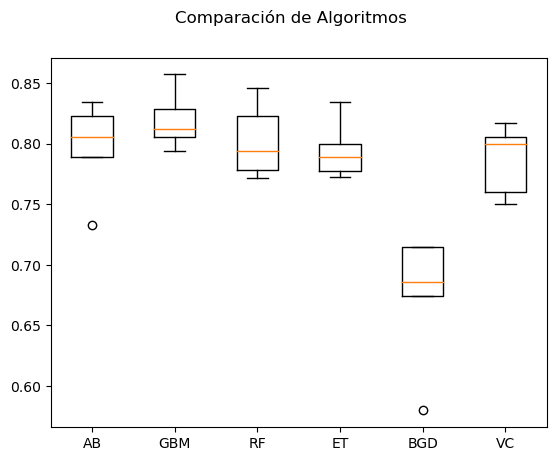

In [205]:
# Comparamos Algortimos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [206]:
# Usamos el metodo yeo-johnson
pipelines = []
pipelines.append(('RBS AB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier(random_state=seed))])))
pipelines.append(('RBS GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier(random_state=seed))])))
pipelines.append(('RBS RF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(random_state=seed))])))
pipelines.append(('RBS ET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier(random_state=seed))])))
pipelines.append(('RBS BGD', Pipeline([('Scaler', MinMaxScaler()),('BGD', BaggingClassifier(base_estimator= SVC(C=0.6, kernel="sigmoid"), random_state=seed))])))
pipelines.append(('RBS VC', Pipeline([('Scaler', MinMaxScaler()),('VC', VotingClassifier(models, voting="hard"))])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

RBS AB: 79.69%
RBS GBM: 81.96%
RBS RF: 80.14%
RBS ET: 79.45%
RBS BGD: 70.90%
RBS VC: 80.25%


In [207]:
# Usamos el metodo yeo-johnson
pipelines = []
pipelines.append(('YH AB', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('AB', AdaBoostClassifier(random_state=seed))])))
pipelines.append(('YH GBM', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('GBM', GradientBoostingClassifier(random_state=seed))])))
pipelines.append(('YH RF', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('RF', RandomForestClassifier(random_state=seed))])))
pipelines.append(('YH ET', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('ET', ExtraTreesClassifier(random_state=seed))])))
pipelines.append(('YH BGD', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('BGD', BaggingClassifier(base_estimator= SVC(C=0.6, kernel="linear"), random_state=seed))])))
pipelines.append(('YH VC', Pipeline([('Scaler', PowerTransformer(method="yeo-johnson")),('VC', VotingClassifier(models, voting="hard"))])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

YH AB: 79.69%
YH GBM: 82.08%
YH RF: 80.14%
YH ET: 79.00%
YH BGD: 78.31%
YH VC: 80.71%


## Optimizamos los Modelos Ensamblados

In [215]:
# Modificamos los Hiperparametros de RandomForestClassifier, ya que fue uno de los que nos dió mejor resultado.

n_estimators = np.array([250,300,400,450])
criterion = np.array(["gini", "entropy", "log_loss"])
max_depth = np.array([3,4,5,6])
max_features = np.array(["sqrt", "log2"])
                        
param_grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth= max_depth, max_features=max_features)

model = RandomForestClassifier(random_state=7)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8253766233766233 using {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}


In [214]:
# Modificando Hiperparametro de GradientBoostingRegressor

k_values = np.array([50,100,150,200,250,300,350,400])
loss = np.array(["log_loss", "deviance", "exponential"])
criterion = np.array([ "friedman_mse", "squared_error" ])
max_features = np.array([ "auto", "sqrt", "log2" ])

param_grid = dict(loss = loss, n_estimators=k_values, criterion=criterion)

model = GradientBoostingClassifier(random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8310584415584416 using {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 150}


In [219]:
pt = PowerTransformer()
Ajuste_YH = pt.fit(X_train)
Scaled_X_YH = pt.transform(X_train)
# Modificando Hiperparametro de GradientBoostingRegressor

k_values = np.array([50,100,150,200,250,300,350,400])
loss = np.array(["log_loss", "deviance", "exponential"])
criterion = np.array([ "friedman_mse", "squared_error" ])
max_features = np.array([ "auto", "sqrt", "log2" ])

param_grid = dict(loss = loss, n_estimators=k_values, criterion=criterion)

model = GradientBoostingClassifier(random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(Scaled_X_YH, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8321948051948052 using {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 150}


## Fase de Forecasting

In [274]:
model_SVC =SVC(kernel="poly", C=3.0).fit(rescaledX, Y_train)
y_predic_train = model_SVC.predict(rescaledX)

print("Accuracy: ",accuracy_score(Y_train, y_predic_train))

Accuracy:  0.8264840182648402


In [275]:
print(f"Accuracy: {accuracy_score(Y_train, y_predic_train)*100.:.2f}%")
print(confusion_matrix(Y_train, y_predic_train))
print(classification_report(Y_train, y_predic_train))

Accuracy: 82.65%
[[510  25]
 [127 214]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       535
           1       0.90      0.63      0.74       341

    accuracy                           0.83       876
   macro avg       0.85      0.79      0.80       876
weighted avg       0.84      0.83      0.82       876



## Realizamos el test para enviar las predicciones a Kaggle

In [258]:
# Evaluacion sobre el Test
test = pd.read_csv(r"C:\Users\GUSTAVO\Desktop\GustavoALL\Cursos\01_ Bases de datos para Practicar\Titanic\test.csv")
df_index2 = pd.DataFrame(test["PassengerId"], columns=["PassengerId"])
del test["PassengerId"]
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [259]:
del test["Name"] 
del test["Ticket"]
del test["Cabin"]

In [260]:
test["Pclas"] = 0
test.loc[test["Pclass"]==1,'Pclas']="Primera Clase"
test.loc[test["Pclass"]==2,'Pclas']="Segunda Clase"
test.loc[test["Pclass"]==3,'Pclas']="Tercera Clase"
del test["Pclass"]

test.columns = test.columns.str.replace("Pclas", "Pclass")

In [261]:
et_encoder = LabelEncoder()
test["Sex"] = et_encoder.fit_transform(test["Sex"]) 

In [262]:
test_embarked = pd.get_dummies(test["Embarked"])
test_pclass = pd.get_dummies(test["Pclass"])

del test["Embarked"]
del test["Pclass"]
test = pd.concat([test,test_embarked, test_pclass], axis=1) 

In [263]:
imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(test)
X = pd.DataFrame(X, columns=test.columns)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            418 non-null    float64
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    float64
 3   Parch          418 non-null    float64
 4   Fare           418 non-null    float64
 5   C              418 non-null    float64
 6   Q              418 non-null    float64
 7   S              418 non-null    float64
 8   Primera Clase  418 non-null    float64
 9   Segunda Clase  418 non-null    float64
 10  Tercera Clase  418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


In [264]:
test = pd.DataFrame(X, columns= test.columns)

test.index = df_index2["PassengerId"]
test.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,Primera Clase,Segunda Clase,Tercera Clase
PassengerId,,,,,,,,,,,
892,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,0.0,1.0
893,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,0.0,1.0
894,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0
895,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0
896,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,0.0,1.0


In [265]:
Scaled_test = scaler.transform(test)

In [276]:
#prediccion de survived
y_pred_test = model_SVC.predict(Scaled_test)


print(y_pred_test[0:10])

[0 0 0 0 0 0 1 0 1 0]


In [272]:
#Exportamos nuestros datos

def dow_output(y_pred, name):
        output = pd.DataFrame({"PassengerId": test.index,
                              "Survived": y_pred})
        output.to_csv(name, index=False)

In [277]:
dow_output(y_pred_test, "Gustavo_pred_SVC.csv")

Una ves enviado las predicciones a Kaggle, el resultado fue  
--El modelo SVC, tiene un acurracy del 0.7846 

**MUCHAS GRACIAS**